# É possível utilizar algoritmos de aprenizado de máquina para analisar sentenças judiciais criminais e determinar se são condenatórias ou absolutórias?

Foram obtidas, da página do TJMG (https://www5.tjmg.jus.br/jurisprudencia/sentenca.do), mais de 20 mil sentenças criminais, das seguintes varas, todas da Comarca de Belo Horizonte:

* 3ª Vara Criminal: 793
* 4ª Vara Criminal: 3.451
* 5ª Vara Criminal: 962
* 7ª Vara Criminal: 1.653
* 8ª Vara Criminal: 2.222
* 9ª Vara Criminal: 1.570
* 10ª Vara Criminal: 1.945

Total nas Varas Criminais: 12.596

* 1ª Vara de Tóxicos: 2.744
* 2ª Vara de Tóxicos: 3.339
* 3ª Vara de Tóxicos: 3.625

Total nas Varas de Tóxicos: 9.708

Total agrupado: 22.304

Todas as sentenças foram publicadas entre 2014 e 2020.

As sentenças foram inicialmente divididas de acordo com seus juízos de origem e separadas em pastas individuais para cada vara.

As sentenças não estavam identificadas ou ordenadas de nenhuma outra forma.

**inserir link para o banco com todas as sentenças sem classificar**

# 1ª etapa - Primeira classificação humana

Para iniciar a análise do material obtido, foi realizada uma classificação humana por amostragem.

Os objetivos dessa primeira classificação humana são:

    a) analisar superficialmente o material baixado e verificar sua integridade e concordância com o esperado.
    b) classificar (label) algumas sentenças para aplicação em algoritmos de aprendizado supervisionado.

O método utilizado foi:

    abrir aleatoriamente sentenças de cada juízo comum e classificar cada sentença acessada até que fossem encontradas vinte sentenças absolutórias.

*Nesse momento inicial não foram classificadas nenhuma sentença das varas de tóxicos. Em uma etapa posterior nessa investigação, vamos utilizar o modelo que foi treinado apenas com sentenças de varas criminais para classificar as sentenças das varas de tóxicos, com o intuito de investigar também a diferença de linguagem entre essas varas e de estudar como melhor trabalhar computacionalmente com as diferenças de linguagem que surgirão, sobretudo quando da nacionalização do banco de dados.*

Foram definidas as seguintes categorias de sentença:
    
    (A) absolutórias: sentenças que absolvem todos os denunciados de todos os crimes do processo.
    (C) condenatórias: sentenças que condenam todos os denunciados por um ou mais dos crimes do processo.
    (AC) absolutórias e condenatórias: sentenças que condenam um ou mais dos denunciados por um ou mais dos crimes do processo e absolvem um ou mais dos denunciados de todos os crimes do processo.
    (N) neutras: sentenças de prescrição, embargos de declaração não infringentes, rejeição de queixa, ilegitimidade da parte, coisa julgada, extinção da punibilidade por cumprimento da suspensão condicional, fixação de pena e a absolvição imprópria.

Dessa classificação inicial foram obtidos os seguintes dados:

    Quantidade de condenações em cada vara para se classificarem 20 absolvições:
    
     3ª Vara Criminal: 268
     4ª Vara Criminal: 350
     5ª Vara Criminal:  80
     7ª Vara Criminal:  95
     8ª Vara Criminal: 285
     9ª Vara Criminal: 122
    10ª Vara Criminal: 156

    Condenações por absolvição:
    
     3ª Vara Criminal: 13.4
     4ª Vara Criminal: 17.5
     5ª Vara Criminal:  4.0
     7ª Vara Criminal:  4.7
     8ª Vara Criminal: 14.2
     9ª Vara Criminal:  6.1
    10ª Vara Criminal:  7.8

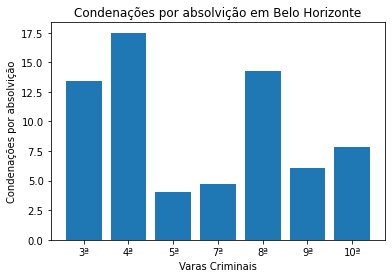

In [10]:
import matplotlib.pyplot as plt
varas = ["3ª", "4ª", "5ª", "7ª", "8ª", "9ª", "10ª"]
condenacoes_20_absolvicoes = [268, 350, 80, 95, 285, 122, 156]
condenacoes_por_absolvicao = [x/20 for x in condenacoes_20_absolvicoes]
plt.bar(varas, condenacoes_por_absolvicao)
plt.xlabel("Varas Criminais")
plt.ylabel("Condenações por absolvição")
plt.title("Condenações por absolvição em Belo Horizonte")
plt.show()

É importante reafirmar que essa tendência foi verificada em uma amostragem muito pequena, e que esses dados iniciais servem mais para fortalecer a pergunta do que como resposta. Será que se analisando uma grande quantidade de sentenças, essas tendências de condenação e absolvição seriam mantidas ou alteradas?  

A classificação manual de sentenças judiciais é uma tarefa cansativa, trabalhosa, que demanda tempo e, sobretudo, é extremamente tediosa. A construção de modelos computacionais que são capazes de classificar automaticamente sentenças a partir apenas de seu próprio texto é uma tarefa que permitirá responder perguntas como a feita acima.

# 2ª etapa - Primeira classificação computacional

Após a classificação estritamente humana, foi possível construir um banco de sentenças classificadas, com certeza de suas categorias. Esse primeiro banco continha:

* 140 sentenças absolutórias
* 140 sentenças condenatórias
* 100 sentenças neutras

**inserir link para o banco inicial**

A partir desse banco inicial, utilizou-se um algoritmo Naive Bayes para uma primeira classificação computacional de todo o material obtido. Em alto nível, o procedimento adotado para essa classificação foi o seguinte:

* Ler, na memória do computador, todas as sentenças já categorizadas, separadas em suas categorias (absolutorias, condenatorias ou neutras).
* Criar uma lista com as 3.000 palavras mais utilizadas em todas as sentenças categorizadas.
* Criar, para cada sentença, uma relação de quais palavras da lista de 3.000 mais populares estão e quais não estão em seu texto. 
* A partir dessas relações, o algoritmo cria relações matemáticas para determinar a qual categoria uma sentença pertence.
* Quando uma sentença ainda não categorizada é passada pelo algoritmo, ele usa as mesmas relações matemáticas para concluir sua categoria.

Essa primeira classificação computacional produz muitos erros, de modo que seus resultados não podem ser aproveitados para uma análise. Inicialmente podemos atribuir a falta de precisão desse primeiro modelo a dois principais motivos:

    1) Utilizar um único algoritmo Naive Bayes, embora confiável e eficiente, pode causar problemas de parcialidade.
    2) A quantidade de sentenças iniciais que foram utilizadas para criar a lista com as 3.000 palavras mais populares é muito pequena, o que causa problemas de precisão e parcialidade.

Felizmente, podemos resolver os dois problemas.

# 3ª etapa - Segunda classificação humana

Utilizando a primeira classificação computacional foi possível dividir automaticamente, ainda que de forma precária, o banco inicial contendo todas as sentenças nas três categorias estudadas. Embora muitos erros tenham ocorrido (estima-se uma média de 50% de erro), essa divisão precária facilitou muito o processo de classificação humana de sentenças absolutórias. Antes, em algumas varas, era preciso classificar quinze sentenças condenatórias para cada sentença absolutória. Agora, em torno de duas.

De posse das sentenças classificadas pelo primeiro modelo computacional, foi extendido o banco de sentenças humanamente classificadas, que passou a possuir:

* 314 absolutórias
* 305 condenatórias
* 200 neutras

**inserir link para o banco extendido**

# 4ª etapa - Segunda classificação computacional

Com um banco de sentenças já classificadas mais de duas vezes maior que o inicial, a esperança era de que uma nova abordagem computacional se mostrasse muito mais efetiva. Mas, a expansão desse banco soluciona apenas um dos problemas apontados acima.

Para tratar também da confiabilidade do algoritmo utlizado, nessa nova abordagem vamos passar a utilizar seis algoritmos diferentes, de diferentes categorias: Naive Bayes, SGD e SVC. 

Seguindo os mesmos passos do modelo proposto acima, vamos agora alimentar os seis algoritmos diferentes com as mesmas sentenças classificadas, de modo que cada algoritmo produzirá, por suas próprias regras, relações matemáticas diferentes entre a lista de palavras mais populares e cada sentença.

Assim, vamos considerar apenas as classificações que forem unânimes entre os seis algoritmos, descartando qualquer classificação em que existir conflito.

Com essas mudanças, executamos novamente a classificação do banco inicial de sentenças não classificadas, obtendo dessa vez resultados melhores.

Realizando uma análise humana do resultado, foram analisadas setecentas sentenças e encontrados 11 erros, o que resulta em uma **margem de erro aproximada de 1,5%**.

Essa nova classificação já nos permite revisitar a taxa de condenações para cada absolvição entre as varas criminais estudadas e verificar se a tendência inicialmente observada se manteve ou se alterou. Estes foram os dados obtidos pelo classificador:

Quantidade de decisões não classificadas em cada vara (devido a falta de consenso entre os classificadores):
     
     3ª Vara Criminal: 13
     4ª Vara Criminal: 49
     5ª Vara Criminal: 41
     7ª Vara Criminal: 26
     8ª Vara Criminal: 83
     9ª Vara Criminal: 43
    10ª Vara Criminal: 46

     Vara Criminal x Condenações x Absolvições
         3ª               727           53
         4ª             2.466          232
         5ª               785          112
         7ª             1.368          259 
         8ª             2.026          112 
         9ª             1.291          212
        10ª             1.404          257     

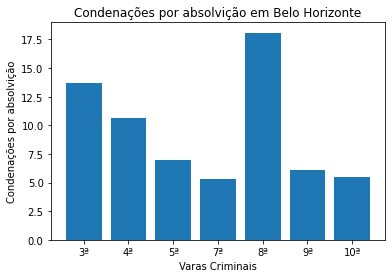

In [2]:
import matplotlib.pyplot as plt
varas = ["3ª", "4ª", "5ª", "7ª", "8ª", "9ª", "10ª"]
condenacoes = [727, 2466, 785, 1368, 2026, 1291, 1404]
absolvicoes = [53, 232, 112, 259, 112, 212, 257]
condenacoes_por_absolvicao = [x / y for x, y in zip(condenacoes, absolvicoes)]
plt.bar(varas, condenacoes_por_absolvicao)
plt.xlabel("Varas Criminais")
plt.ylabel("Condenações por absolvição")
plt.title("Condenações por absolvição em Belo Horizonte")
plt.show()